<a href="https://colab.research.google.com/github/taxuyou/library-recommend-and-timeseries-predict/blob/master/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0_%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8_%EB%8C%80%EC%B6%9C%EB%9F%89_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기 및 전처리

In [0]:
#머신러닝 사이킷런 랜덤포레스트

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv("대출과날씨데이터1.csv", parse_dates=["date"])
train.shape

(10942, 5)

In [0]:
train['date']=train['date'].astype(str)

In [0]:
import datetime
def getDayName(a,b,c):
   
  return ['MON','TUE','WED','THU','FRI','SAT','SUN'][datetime.date(int(a),int(b),int(c)).weekday()]

# 리스트로 저장 -> DataFrame으로 변환순으로 가면되여
# 빈리스트 선언
list1 = []
for i in train['date']:
    a = i[0:4]
    b = i[5:7]
    c = i[8:10]
    # print(getDayName(a,b,c))
    # 리스트에 추가
    list1.append(getDayName(a,b,c))

# 리스트 -> DataFrame으로 전환    
train['days'] = list1
train.head()

,date,c,mm,h,loan,days
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,SUN
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,SUN
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,SUN
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,SUN
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,SUN


In [0]:
## date 칼럼으로 요일 칼럼 holiday 만들어줌
list2 = []
for i in train['days']:
  if i == 'SUN':
    list2.append(1)
  elif i == 'SAT':
    list2.append(1)
  else:
    list2.append(0)
train["holiday"] = list2
train.head()

,date,c,mm,h,loan,days,holiday
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,SUN,1
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,SUN,1
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,SUN,1
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,SUN,1
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,SUN,1


In [0]:
## 일하는 날 칼럼 만들어줌
list3 = []
for i in train['holiday']:
  if i == 0:
    list3.append(1)
  else:
    list3.append(0)

train['workingday'] = list3
train.head()

,date,c,mm,h,loan,days,holiday,workingday
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,SUN,1,0
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,SUN,1,0
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,SUN,1,0
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,SUN,1,0
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,SUN,1,0


In [0]:
train['date']=train['date'].astype(str)

In [0]:
###   계절 컬럼 만들어줌
list4 = []

for i in train['date']:
  b = i[5:7]
  if b == '01' :
    list4.append(1)
  elif b == '02' :
    list4.append(1)
  elif b == '03' :
    list4.append(1)
  elif b == '04' :
    list4.append(2)
  elif b == '05' :
    list4.append(2)            
  elif b == '06' :
    list4.append(2)
  elif b == '07' :
    list4.append(3)
  elif b == '08' :
    list4.append(3)
  elif b == '09' :
    list4.append(3)
  elif b == '10' :
    list4.append(4)
  elif b == '11' :
    list4.append(4)  
  elif b == '12' :
    list4.append(4)
    
train['season'] = list4
train.head()

,date,c,mm,h,loan,days,holiday,workingday,season
0,2017-01-01 09:00:00,-1.1,0.0,97.9,55,SUN,1,0,1
1,2017-01-01 10:00:00,-0.5,0.0,97.7,78,SUN,1,0,1
2,2017-01-01 11:00:00,0.6,0.0,97.9,171,SUN,1,0,1
3,2017-01-01 12:00:00,2.2,0.0,96.3,203,SUN,1,0,1
4,2017-01-01 13:00:00,5.5,0.0,73.2,398,SUN,1,0,1


In [0]:
###   데이터 속성 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10942 entries, 0 to 10941
Data columns (total 9 columns):
date          10942 non-null object
c             10942 non-null float64
mm            10942 non-null float64
h             10942 non-null float64
loan          10942 non-null int64
days          10942 non-null object
holiday       10942 non-null int64
workingday    10942 non-null int64
season        10942 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 769.4+ KB


In [0]:
# date 다시 데이트타임으로 변환
train['date'] = pd.to_datetime(train['date'], errors='coerce')

In [0]:
### 년, 월, 일, 시, 분, 초 칼럼 따로 만들어줌
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["day"] = train["date"].dt.day
train["hour"] = train["date"].dt.hour
train["minute"] = train["date"].dt.minute
train["second"] = train["date"].dt.second
train.shape

(10942, 15)

# 테스트 사이즈 30% 사용

In [0]:
test = train[int(len(train) * 0.3):]

In [0]:
test.head()

,date,c,mm,h,loan,days,holiday,workingday,season,year,month,day,hour,minute,second
3282,2017-10-12 12:00:00,13.5,0.0,82.5,278,THU,0,1,4,2017,10,12,12,0,0
3283,2017-10-12 13:00:00,13.2,0.0,88.8,194,THU,0,1,4,2017,10,12,13,0,0
3284,2017-10-12 14:00:00,13.3,0.5,91.7,272,THU,0,1,4,2017,10,12,14,0,0
3285,2017-10-12 15:00:00,13.3,0.0,87.0,227,THU,0,1,4,2017,10,12,15,0,0
3286,2017-10-12 16:00:00,13.3,0.0,88.8,259,THU,0,1,4,2017,10,12,16,0,0


# Feature Engineering

In [0]:
train["year"] = train["date"].dt.year
train["month"] = train["date"].dt.month
train["day"] = train["date"].dt.day
train["hour"] = train["date"].dt.hour
train["minute"] = train["date"].dt.minute
train["second"] = train["date"].dt.second
train["dayofweek"] = train["date"].dt.dayofweek
train.shape

(10942, 16)

In [0]:
test["year"] = test["date"].dt.year
test["month"] = test["date"].dt.month
test["day"] = test["date"].dt.day
test["hour"] = test["date"].dt.hour
test["minute"] = test["date"].dt.minute
test["second"] = test["date"].dt.second
test["dayofweek"] = test["date"].dt.dayofweek
test.shape

(7660, 16)

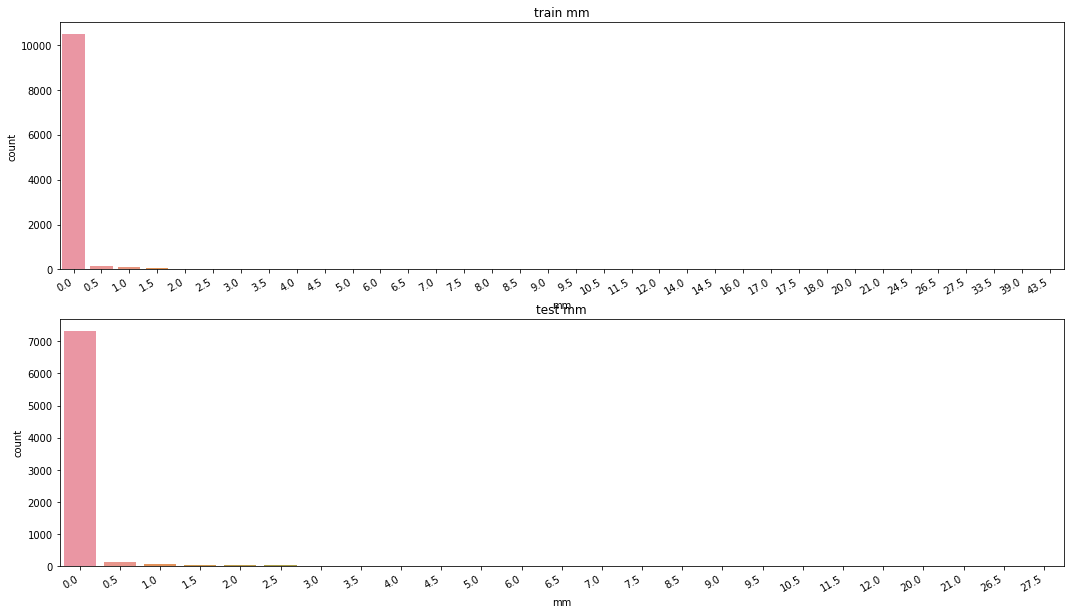

In [0]:
# 강수량 0 값이 가장 많다. => 잘못 기록된 데이터를 고쳐 줄 필요가 있음
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(18,10)

plt.sca(axes[0])
plt.xticks(rotation=30, ha='right')
axes[0].set(ylabel='loan',title="train mm")
sns.countplot(data=train, x="mm", ax=axes[0])

plt.sca(axes[1])
plt.xticks(rotation=30, ha='right')
axes[1].set(ylabel='loan',title="test mm")
sns.countplot(data=test, x="mm", ax=axes[1])

In [0]:
# 강수량의 0값에 특정 값을 넣어준다.
# 평균을 구해 일괄적으로 넣어줄 수도 있지만, 예측의 정확도를 높이는 데 도움이 될것 같진 않다.
# train.loc[train["mm"] == 0, "mm"] = train["mm"].mean()
# test.loc[train["mm"] == 0, "mm"] = train["mm"].mean()

In [0]:
# # 강수량이 0인것과 아닌 것의 세트를 나누어 준다.
trainmm0 = train.loc[train['mm'] == 0]
trainmmNot0 = train.loc[train['mm'] != 0]
print(trainmm0.shape)
print(trainmmNot0.shape)

(10475, 16)
(467, 16)


In [0]:
# 그래서 머신러닝으로 예측을 해서 풍속을 넣어주도록 한다.
from sklearn.ensemble import RandomForestClassifier

def predict_mm(data):
    
    # 강수량이 0인것과 아닌 것을 나누어 준다.
    datamm0 = data.loc[data['mm'] == 0]
    datammNot0 = data.loc[data['mm'] != 0]
    
    # 강수량을 예측할 피처를 선택한다.
    wCol = ["season", "h", "month", "year", "c"]

    # 강수량이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    datammNot0["mm"] = datammNot0["mm"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_mm = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 강수량을 학습시킨다.
    rfModel_mm.fit(datammNot0[wCol], datammNot0["mm"])

    # 학습한 값을 바탕으로 강수량이 0으로 기록 된 데이터의 강수량을 예측한다.
    mm0Values = rfModel_mm.predict(X = datamm0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictmm0 = datamm0
    predictmmNot0 = datammNot0

    # 값이 0으로 기록 된 강수량에 대해 예측한 값을 넣어준다.
    predictmm0["mm"] = mm0Values

    # datammNot0 0이 아닌 강수량이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictmmNot0.append(predictmm0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["mm"] = data["mm"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

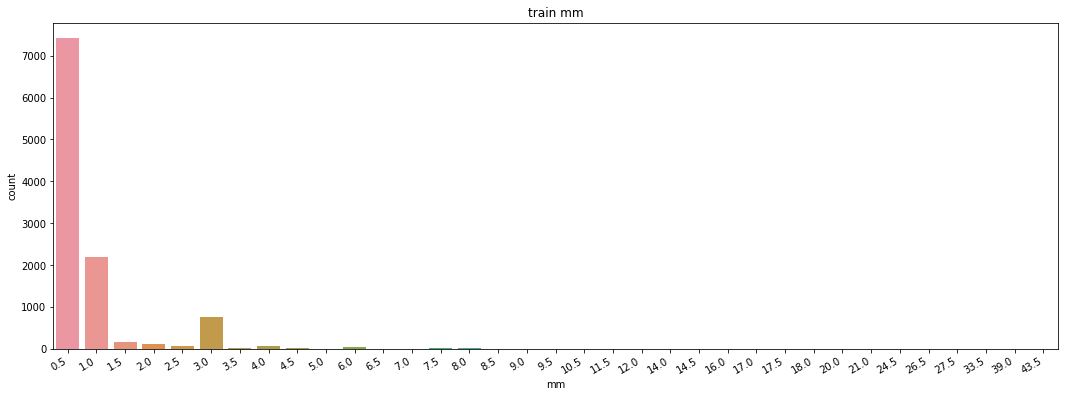

In [0]:
# 0값을 조정한다.
train = predict_mm(train)
# test = predict_mm(test)

# mm 의 0값을 조정한 데이터를 시각화
fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)

plt.sca(ax1)
plt.xticks(rotation=30, ha='right')
ax1.set(ylabel='loan',title="train mm")
sns.countplot(data=train, x="mm", ax=ax1)

# Feature Selection

*   신호와 잡음을 구분해야 한다.
*   피처가 많다고 해서 무조건 좋은 성능을 내지 않는다.
*   피처를 하나씩 추가하고 변경해 가면서 성능이 좋지 않은 피처는 제거하도록 한다.



In [0]:
# 연속형 feature와 범주형 feature 
# 연속형 feature = ["c","mm","h"]
# 범주형 feature의 type을 category로 변경 해 준다.
categorical_feature_names = ["season","holiday","workingday",
                             "dayofweek","month","year","hour"]

for var in categorical_feature_names:
    train[var] = train[var].astype("category")
    test[var] = test[var].astype("category")

In [0]:
feature_names = ["season", "c", "h", "year", "hour",
                 "dayofweek", "holiday", "workingday"]

feature_names

['season', 'c', 'h', 'year', 'hour', 'dayofweek', 'holiday', 'workingday']

In [0]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10942, 8)


,season,c,h,year,hour,dayofweek,holiday,workingday
0,1,1.6,96.7,2017,19,0,0,1
1,1,6.5,73.5,2017,18,6,1,0
2,1,0.9,95.7,2017,10,2,0,1
3,1,1.7,95.9,2017,11,2,0,1
4,1,2.3,97.7,2017,12,2,0,1


In [0]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(7660, 8)


,season,c,h,year,hour,dayofweek,holiday,workingday
3282,4,13.5,82.5,2017,12,3,0,1
3283,4,13.2,88.8,2017,13,3,0,1
3284,4,13.3,91.7,2017,14,3,0,1
3285,4,13.3,87.0,2017,15,3,0,1
3286,4,13.3,88.8,2017,16,3,0,1


In [0]:
label_name = "loan"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10942,)


0      1
1     15
2    134
3    235
4    276
Name: loan, dtype: int64

# Score
# RMSLE

과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다.

오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root) 으로 값이 작을 수록 정밀도가 높다.

0에 가까운 값이 나올 수록 정밀도가 높은 값이다.

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE)

![대체 텍스트](https://render.githubusercontent.com/render/math?math=%5Csqrt%7B%5Cfrac%7B1%7D%7Bn%7D%20%5Csum_%7Bi%3D1%7D%5En%20%28%5Clog%28p_i%20%2B%201%29%20-%20%5Clog%28a_i%2B1%29%29%5E2%20%7D&mode=display)



*   ${n}$ is the number of hours in the test set
*$p_i$ is your predicted count
*$a_i$ is the actual count
*$\log(x)$ is the natural logarithm

*좀 더 자세한 설명은 : RMSLE cost function

*잔차(residual)에 대한 평균에 로그를 씌운 값이다. => 과대평가 된 항목보다 과소 평가 된 항목에 패널티를 주기위해

*정답에 대한 오류를 숫자로 나타낸 값으로 값이 클 수록 오차가 크다는 의미다.
값이 작을 수록 오류가 적다는 의미를 나타낸다.

![대체 텍스트](https://camo.githubusercontent.com/215b635af41ad39e41f0396e1a0578042647e0f3/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f7468756d622f372f37332f4c6f6761726974686d732e7376672f34353670782d4c6f6761726974686d732e7376672e706e67)



In [0]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

# Cross Validation 교차 검증

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

# RandomForest

In [0]:
from sklearn.ensemble import RandomForestRegressor
max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs=-1,
                              random_state=0)
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [0]:
print(model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


In [0]:
%time score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("Score= {0:.5f}".format(score))

CPU times: user 3.17 s, sys: 777 ms, total: 3.94 s
Wall time: 15.6 s
Score= 0.68305


# Train

In [0]:
# 학습시킴, 피팅 - 피처와 레이블을 넣어주면 알아서 학습을 함
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

# 예측

In [0]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[0:100]

(7660,)


array([260.57, 211.05, 249.67, 226.18, 268.57, 275.54, 121.85,  68.86,
        58.75,   4.58,   1.91,   3.21, 108.76, 156.23, 217.74, 214.66,
       227.31, 182.72, 296.81, 254.19, 341.29, 113.04,  72.46,  73.48,
         1.84, 115.42, 324.12, 372.46, 406.49, 393.74, 427.99, 491.25,
       641.92, 816.57,  35.27,   4.01,  94.14, 184.75, 305.93, 440.97,
       525.6 , 589.29, 756.07, 722.32, 922.67,  21.98,   3.25,  65.81,
       136.8 , 113.73, 183.01, 149.13, 129.04, 137.38, 163.51, 168.15,
        63.16,  51.31,  70.66,   2.22,   1.27,   4.26, 117.65, 187.98,
       182.67, 292.01, 216.32, 174.5 , 205.36, 217.17, 307.1 , 102.12,
        82.39,  80.62,   2.9 ,   4.87, 108.24, 173.27, 181.07, 238.79,
       213.71, 185.42, 171.07, 229.55, 342.67,  72.92,  83.53,  83.38,
         3.24, 115.33, 156.44, 252.2 , 209.44, 183.77, 210.46, 190.9 ,
       225.03, 270.27,  73.46,  74.1 ])

[Text(0.5, 1.0, 'test')]

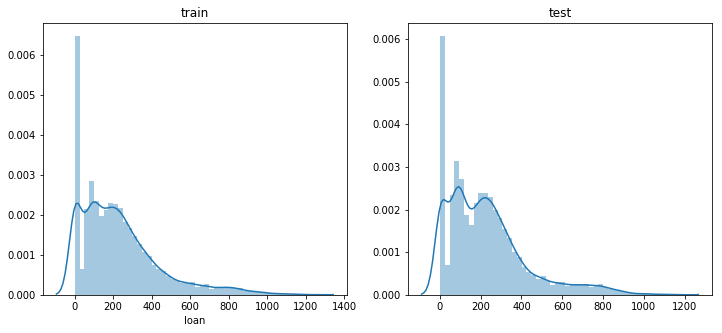

In [0]:
# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

# Submit